In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *;
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('./diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
scaler = StandardScaler()
data['Pregnancies'] = scaler.fit_transform(data['Pregnancies'].values.reshape(-1,1))
data['Glucose'] = scaler.fit_transform(data['Glucose'].values.reshape(-1,1))
data['BloodPressure'] = scaler.fit_transform(data['BloodPressure'].values.reshape(-1,1))
data['SkinThickness'] = scaler.fit_transform(data['SkinThickness'].values.reshape(-1,1))
data['Insulin'] = scaler.fit_transform(data['Insulin'].values.reshape(-1,1))
data['BMI'] = scaler.fit_transform(data['BMI'].values.reshape(-1,1))
data['DiabetesPedigreeFunction'] = scaler.fit_transform(data['DiabetesPedigreeFunction'].values.reshape(-1,1))
data['Age'] = scaler.fit_transform(data['Age'].values.reshape(-1,1))

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [7]:
X = data.drop(columns = 'Outcome', axis = 1)
Y = data['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [8]:
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

In [9]:
predictions= classifier.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       152
           1       0.78      0.67      0.72        79

    accuracy                           0.82       231
   macro avg       0.81      0.79      0.80       231
weighted avg       0.82      0.82      0.82       231



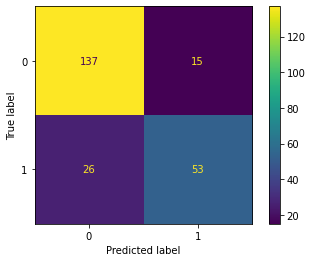

In [10]:
ConfusionMatrixDisplay.from_predictions(Y_test, predictions)

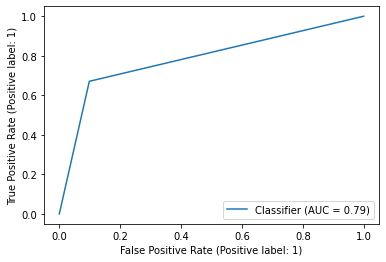

In [11]:
RocCurveDisplay.from_predictions(Y_test,  predictions)